<a href="https://colab.research.google.com/github/Jayhubexp/Deep-Learning/blob/main/01_neural_network_regression_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in TensorFlow

There are various definitions for a regression problem, but we are going to simplify it in this tutorial: predicting a number.

In [ ]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.15.0


## Creating data to view and fit

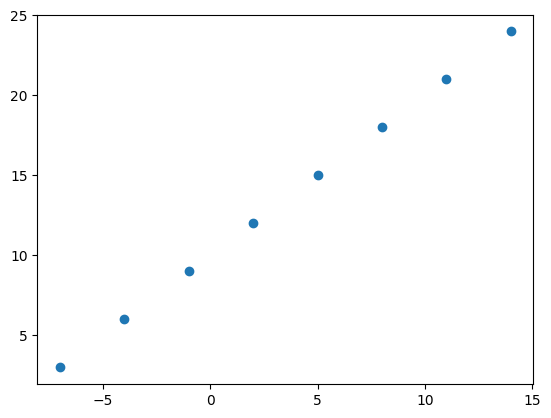

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create feature(Input data which is conventionally represented as 'X')
X = np.array([[-7.0], [-4.0], [-1.0], [2.0], [5.0], [8.0], [11.0], [14.0]])

# Create labels(which is often represented as 'y' also known as dependent features or outcome)
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

#Visualize it
plt.scatter(X, y)


In [ ]:
y ==X + 10

array([[ True, False, False, False, False, False, False, False],
       [False,  True, False, False, False, False, False, False],
       [False, False,  True, False, False, False, False, False],
       [False, False, False,  True, False, False, False, False],
       [False, False, False, False,  True, False, False, False],
       [False, False, False, False, False,  True, False, False],
       [False, False, False, False, False, False,  True, False],
       [False, False, False, False, False, False, False,  True]])

## Input and Output shapes

In [ ]:
# Create a demo tensor for a housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape


((1338, 6), (1338,))

In [ ]:
#Turn numpy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8, 1), dtype=float64, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

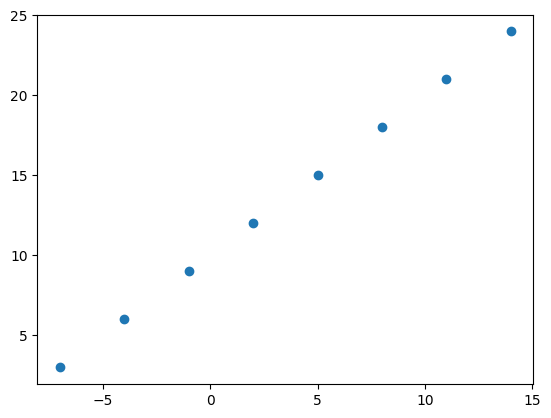

In [ ]:
plt.scatter(X, y)

In [ ]:
X.shape, y.shape

(TensorShape([8, 1]), TensorShape([8]))

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers.

2. **Compiling a model** - define the loss function (which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).

3. **Fitting a model** - letting the model try to find patterns between X&y (features and labels)

In [ ]:
#Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),#sgd is short for stochastic gradient descent
              metrics = ["mae"])

# 3. Fit the model
model.fit(X, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 870ms/step - loss: 19.5690 - mae: 19.5690
Epoch 2/5
1/1 [==============================] - 0s 12ms/step - loss: 19.2877 - mae: 19.2877
Epoch 3/5
1/1 [==============================] - 0s 9ms/step - loss: 19.0065 - mae: 19.0065
Epoch 4/5
1/1 [==============================] - 0s 10ms/step - loss: 18.7252 - mae: 18.7252
Epoch 5/5
1/1 [==============================] - 0s 10ms/step - loss: 18.4440 - mae: 18.4440


In [ ]:
# Checking X and y
X, y

(<tf.Tensor: shape=(8, 1), dtype=float64, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# I'm going to try and make a prediction using my trained model from the data
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 92ms/step


array([[-17.580494]], dtype=float32)

In [ ]:
y_pred + 14

array([[-3.580494]], dtype=float32)

## Improving Our model
We can improve our model, by altering the steps we took in creating the model:

1. **Creating a model** - here we may add more layers, increase the number of hidden units (Also known as neurons) within each of the hidden layers, and also change the activation functions of each layer.
2. **Compiling a model** - here we may change the optimization function or the *learning rate* of the optimization function
3. **Fitting a model** - here we may fit a model for more **epochs** (leave it training for longer) or more data (give the model more data to learn from)

In [ ]:
# Rebuilding my model for optimization
Model = tf.keras.Sequential([
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(1)
])

Model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(),
              metrics= ["mae"])

Model.fit(X, y, epochs=8)

Epoch 1/8
1/1 [==============================] - 1s 1s/step - loss: 14.8977 - mae: 14.8977
Epoch 2/8
1/1 [==============================] - 0s 24ms/step - loss: 14.5943 - mae: 14.5943
Epoch 3/8
1/1 [==============================] - 0s 21ms/step - loss: 14.2917 - mae: 14.2917
Epoch 4/8
1/1 [==============================] - 0s 18ms/step - loss: 13.9898 - mae: 13.9898
Epoch 5/8
1/1 [==============================] - 0s 13ms/step - loss: 13.6885 - mae: 13.6885
Epoch 6/8
1/1 [==============================] - 0s 11ms/step - loss: 13.3875 - mae: 13.3875
Epoch 7/8
1/1 [==============================] - 0s 11ms/step - loss: 13.0864 - mae: 13.0864
Epoch 8/8
1/1 [==============================] - 0s 11ms/step - loss: 12.7850 - mae: 12.7850


In [ ]:
Model.predict([17.0])

1/1 [==============================] - 0s 143ms/step


array([[4.3714695]], dtype=float32)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation =None),
    tf.keras.layers.Dense(1)
])

model.compile(loss ="mae",
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics =["mae"])

model.fit(X, y, epochs=100)


Epoch 1/100
1/1 [==============================] - 1s 899ms/step - loss: 14.3881 - mae: 14.3881
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 13.6486 - mae: 13.6486
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 12.9122 - mae: 12.9122
Epoch 4/100
1/1 [==============================] - 0s 18ms/step - loss: 12.1779 - mae: 12.1779
Epoch 5/100
1/1 [==============================] - 0s 16ms/step - loss: 11.4445 - mae: 11.4445
Epoch 6/100
1/1 [==============================] - 0s 13ms/step - loss: 10.7095 - mae: 10.7095
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 9.9706 - mae: 9.9706
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 9.2252 - mae: 9.2252
Epoch 9/100
1/1 [==============================] - 0s 14ms/step - loss: 8.4708 - mae: 8.4708
Epoch 10/100
1/1 [==============================] - 0s 14ms/step - loss: 7.7048 - mae: 7.7048
Epoch 11/100
1/1 [==============================] - 0s 1

In [ ]:
model.predict([17.0])

1/1 [==============================] - 0s 146ms/step


array([[26.980177]], dtype=float32)

## Analysis
From the experiment above, We see that setting the learning rate to a higher value results in a much specific result than other improvement models.

- Hence the learning rate is the most important hyper parameter of many neural networks.


## Evaluating a model
In practice, the typical workflow process for bulding neural networks is:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it...
```


When it comes to evaluation... there are 3 words
> "Visualize, visualize, visualize.."

In [ ]:
# Making a bigger dataset
X = tf.range(-100, 100, 4)
X
X_shape = tf.reshape(X, (10,5))
X_shape

<tf.Tensor: shape=(10, 5), dtype=int32, numpy=
array([[-100,  -96,  -92,  -88,  -84],
       [ -80,  -76,  -72,  -68,  -64],
       [ -60,  -56,  -52,  -48,  -44],
       [ -40,  -36,  -32,  -28,  -24],
       [ -20,  -16,  -12,   -8,   -4],
       [   0,    4,    8,   12,   16],
       [  20,   24,   28,   32,   36],
       [  40,   44,   48,   52,   56],
       [  60,   64,   68,   72,   76],
       [  80,   84,   88,   92,   96]], dtype=int32)>

In [ ]:
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

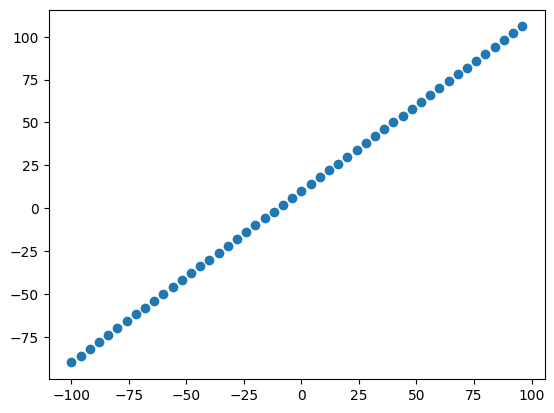

In [ ]:
# Visualize the data
import matplotlib.pyplot as plt
plt.scatter(X_shape, y)

## The 3 sets..
* The training set - model learns from this data(typically 70-80% of the total data we're working on)
* Validation set - the model gets tuned pn this data(typically 10-15% of the available data)
* Test set - the model gets evaluated on this data to test what it has learned(typically 10-15% of the available data)


In [ ]:
# Split the data into train and test sets
X_train = tf.reshape(X_shape, [-1])[:40] # first 40 samples of the dataset (80% of the data)
X_train = tf.reshape(X_train, (40, 1))
y_train = y[:40]

X_test = X_shape[8:] #last 10 samples of the dataset (20%)
y_test = y[40:]
X_test = tf.reshape(X_test, (10,1))
X_test, y_test

(<tf.Tensor: shape=(10, 1), dtype=int32, numpy=
 array([[60],
        [64],
        [68],
        [72],
        [76],
        [80],
        [84],
        [88],
        [92],
        [96]], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

## visulaizing the Test and training data sets

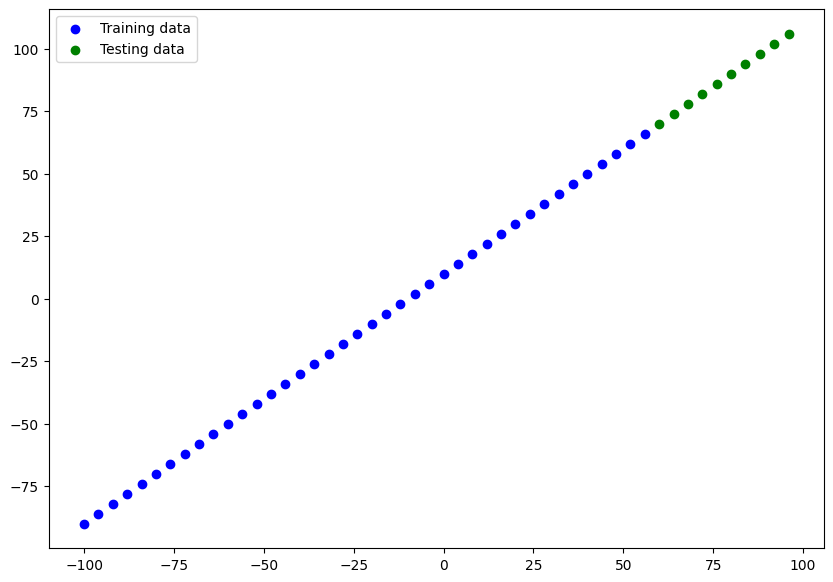

In [ ]:
plt.figure(figsize=(10, 7))
# Plot the training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
# Plot the test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")
plt.legend();

In [ ]:
# Creating a neural network model for the data above
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="inputLayer"),
    tf.keras.layers.Dense(1, name = "outputLayer")
], name= "model_1")

#Compiling the model
model.compile(loss= tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics =["mae"])

#Fitting the model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Dense)          (None, 10)                20        
                                                                 
 outputLayer (Dense)         (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, epochs=100, verbose=0)

## Visulaizing the model's predictions


In [ ]:
#Make some predictions
y_pred = model.predict(X_test)
y_pred, y_test

1/1 [==============================] - 0s 104ms/step


(array([[34.900524],
        [37.13101 ],
        [39.36149 ],
        [41.591972],
        [43.822453],
        [46.052933],
        [48.283417],
        [50.513893],
        [52.744373],
        [54.974854]], dtype=float32),
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

In [ ]:
# Creating a ploting function
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = y_pred):
    """Plots training data, test data, and compares them"""
    plt.figure(figsize=(10,7))

    plt.scatter(train_data, train_labels, c="y", label="Training data")
    plt.scatter(test_data, test_labels, c="g", label="Testing data")
    plt.scatter(test_data, predictions, c="r", label="Predictions")
    plt.legend();

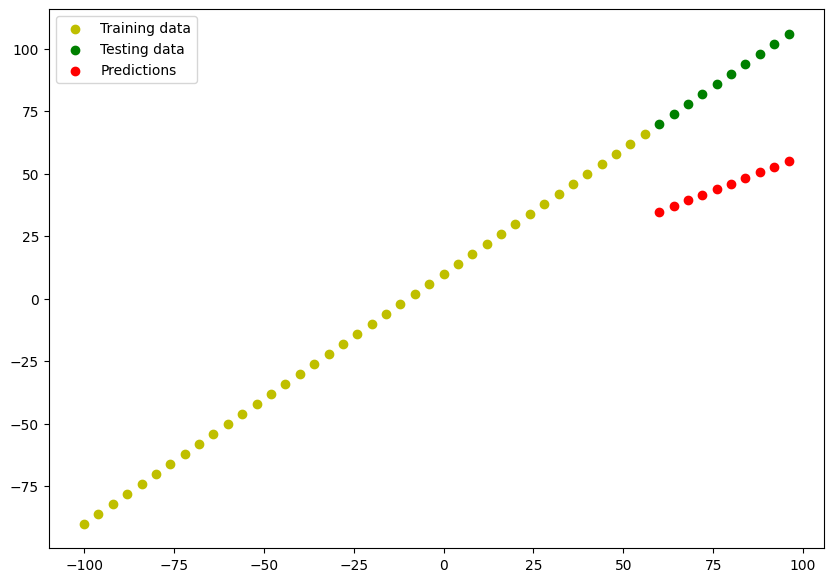

In [ ]:
plot_predictions()

In [ ]:
#Evaluate model
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 272ms/step - loss: 43.0623 - mae: 43.0623


[43.06230926513672, 43.06230926513672]

In [ ]:
y_pred = tf.constant(y_pred)
y_pred = tf.squeeze(y_pred)
y_pred

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([34.900524, 37.13101 , 39.36149 , 41.591972, 43.822453, 46.052933,
       48.283417, 50.513893, 52.744373, 54.974854], dtype=float32)>

In [ ]:
tf.keras.losses.mean_absolute_error(y_test, y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=43.062305>

In [ ]:
tf.random.set_seed(42)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])

model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 13ms/step - loss: 9.2577 - mae: 9.2577
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 8.9558 - mae: 8.9558
Epoch 3/100
2/2 [==============================] - 0s 35ms/step - loss: 12.7298 - mae: 12.7298
Epoch 4/100
2/2 [==============================] - 0s 20ms/step - loss: 8.3542 - mae: 8.3542
Epoch 5/100
2/2 [==============================] - 0s 19ms/step - loss: 11.8733 - mae: 11.8733
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 10.9986 - mae: 10.9986
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 8.4355 - mae: 8.4355
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 8.8590 - mae: 8.8590
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 17.0375 - mae: 17.0375
Epoch 10/100
2/2 [==============================] - 0s 10ms/step - loss: 12.4966 - mae: 12.4966
Epoch 11/100
2/2 [==============================] - 0s 7ms/step 

1/1 [==============================] - 0s 69ms/step


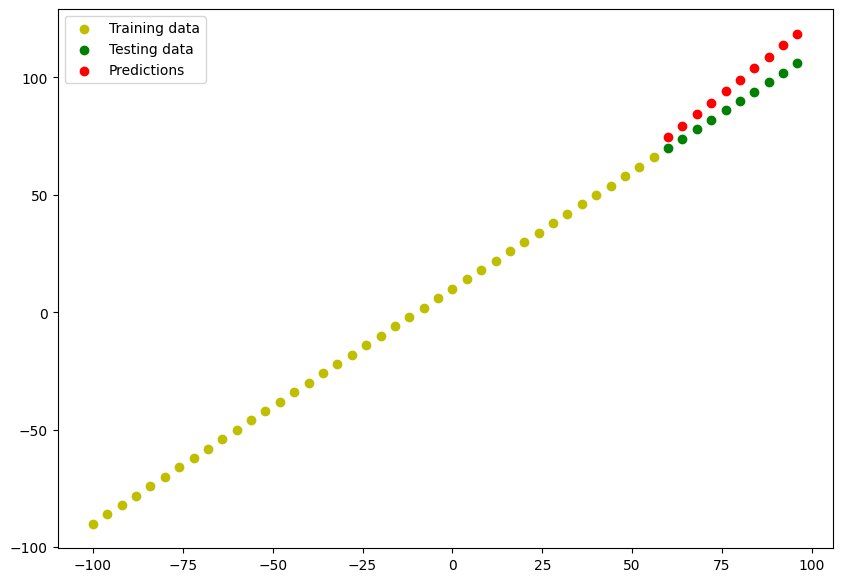

In [ ]:
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions= y_preds_1)

In [ ]:
mae_1 = tf.metrics.mae(y_test, tf.squeeze(y_preds_1))
mae_1

<tf.Tensor: shape=(), dtype=float32, numpy=8.608874>

In [ ]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])

model_2.fit(X_train, y_train, epochs= 100)

Epoch 1/100
2/2 [==============================] - 1s 12ms/step - loss: 34.3974 - mae: 34.3974
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: 27.9041 - mae: 27.9041
Epoch 3/100
2/2 [==============================] - 0s 10ms/step - loss: 33.1885 - mae: 33.1885
Epoch 4/100
2/2 [==============================] - 0s 11ms/step - loss: 26.8102 - mae: 26.8102
Epoch 5/100
2/2 [==============================] - 0s 10ms/step - loss: 14.6713 - mae: 14.6713
Epoch 6/100
2/2 [==============================] - 0s 10ms/step - loss: 11.6899 - mae: 11.6899
Epoch 7/100
2/2 [==============================] - 0s 9ms/step - loss: 12.7549 - mae: 12.7549
Epoch 8/100
2/2 [==============================] - 0s 12ms/step - loss: 11.0668 - mae: 11.0668
Epoch 9/100
2/2 [==============================] - 0s 9ms/step - loss: 40.0259 - mae: 40.0259
Epoch 10/100
2/2 [==============================] - 0s 9ms/step - loss: 27.4755 - mae: 27.4755
Epoch 11/100
2/2 [==============================] - 0

1/1 [==============================] - 0s 81ms/step


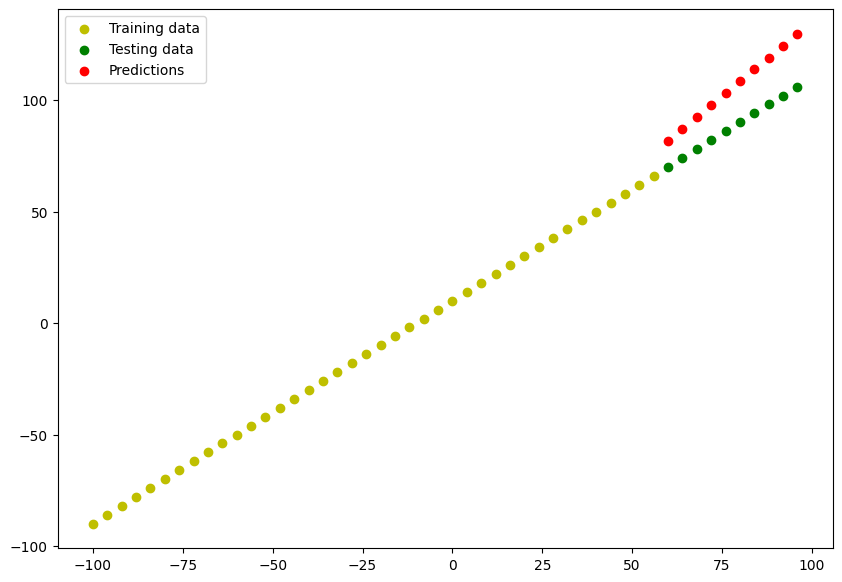

In [ ]:
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions= y_preds_2)

In [ ]:
mae_2 = tf.metrics.mae(y_test, tf.squeeze(y_preds_2))
mae_2

<tf.Tensor: shape=(), dtype=float32, numpy=17.688414>

## Comparing the results of our experiments

In [ ]:
#Importing and using pandas DataFrame
import pandas as pd
model_results = [["model_1",mae_1.numpy()],
                 ["model_2", mae_2.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model","mae"])
all_results

,model,mae
0,model_1,8.608874
1,model_2,17.688414


## Saving our models
Saving our models allows us to use them outside of Google Colab (or wherever they were trained) such as in a web application or a mobile app.

There are two main formats we can save our model's too:

1. The **SavedModel format**
2. The **HDF5 format**

In [ ]:
## Save model using the SavedModel format
model_2.save("Regression_Model")

# Save model using the HDF5 format.
- This format is neccessary if you're going to save your trained model outside of tensorflow environment.


In [ ]:
model_1.save("Model_1.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Loading our saved models back in

In [ ]:
# Load in the SavedModel format for our Regression Model
loaded_Regression = tf.keras.models.load_model("/content/Regression_Model")
loaded_Regression.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                20        
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                20        
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_2_preds = model_2.predict(X_test)
loaded_preds = loaded_Regression.predict(X_test)
model_2_preds == loaded_preds

1/1 [==============================] - 0s 88ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
# Load in a model using the .h5 format
Model_loaded = tf.keras.models.load_model("/content/Model_1.h5")
Model_loaded.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_1_preds = model_1.predict(X_test)
Model_loaded_preds = Model_loaded.predict(X_test)
model_1_preds == Model_loaded_preds

1/1 [==============================] - 0s 69ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Downloading a model or any other file from Google Colab to your local machine
1. You can click download on the file you want to download after right-clicking it.
2. Use code (see the cell below)


In [ ]:
from google.colab import files
files.download("/content/Model_1.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Putting together everything :
**Tackling a  Larger example**

In [ ]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
# One-hot encoding the dataframe features so it's all numbers(Which is necessary for ML and Neural networks)
insurance_oneHot = pd.get_dummies(insurance).astype(int)
insurance_oneHot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27,0,16884,1,0,0,1,0,0,0,1
1,18,33,1,1725,0,1,1,0,0,0,1,0
2,28,33,3,4449,0,1,1,0,0,0,1,0
3,33,22,0,21984,0,1,1,0,0,1,0,0
4,32,28,0,3866,0,1,1,0,0,1,0,0


In [ ]:
# Create X & y values (features and labels)
X = insurance_oneHot.drop("charges", axis=1)
y = insurance_oneHot["charges"]

In [ ]:
# View X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27,0,1,0,0,1,0,0,0,1
1,18,33,1,0,1,1,0,0,0,1,0
2,28,33,3,0,1,1,0,0,0,1,0
3,33,22,0,0,1,1,0,0,1,0,0
4,32,28,0,0,1,1,0,0,1,0,0


In [ ]:
# View y
y.head()

0    16884
1     1725
2     4449
3    21984
4     3866
Name: charges, dtype: int64

In [ ]:
# Create training and tests sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19,2,1,0,1,0,0,1,0,0
1285,47,24,0,1,0,1,0,1,0,0,0
1142,52,24,0,1,0,1,0,0,0,1,0
969,39,34,5,1,0,1,0,0,0,1,0
486,54,21,3,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1095,18,31,4,1,0,1,0,1,0,0,0
1130,39,23,5,1,0,1,0,0,0,1,0
1294,58,25,0,0,1,1,0,1,0,0,0
860,37,47,2,1,0,0,1,0,0,0,1


In [ ]:
# Build a neural network
tf.random.set_seed(42)

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model.compile(loss= tf.keras.losses.mae,
                        optimizer= tf.keras.optimizers.SGD(),
                        metrics= ["mae"])

insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 8646.9375 - mae: 8646.9375
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7872.2803 - mae: 7872.2803
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7586.2070 - mae: 7586.2070
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7789.3564 - mae: 7789.3564
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7676.3325 - mae: 7676.3325
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 7546.7715 - mae: 7546.7715
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 7602.1577 - mae: 7602.1577
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 7795.8423 - mae: 7795.8423
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 7578.9302 - mae: 7578.9302
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 7747.7012 - mae: 7747.7012

In [ ]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 6747.9585 - mae: 6747.9585


[6747.95849609375, 6747.95849609375]

In [ ]:
# From the results above, we need to improve our model and that's what I'm going to do below:
tf.random.set_seed(42)

insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_2.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                          metrics = ["mae"])

history = insurance_model_2.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 11442.6406 - mae: 11442.6406
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 7492.0400 - mae: 7492.0400
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7269.7129 - mae: 7269.7129
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7024.0205 - mae: 7024.0205
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 6751.6230 - mae: 6751.6230
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 6475.9229 - mae: 6475.9229
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 6347.9834 - mae: 6347.9834
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 6197.7876 - mae: 6197.7876
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 6023.9873 - mae: 6023.9873
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 5804.0137 - mae: 5804.01

In [ ]:
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3179.1155 - mae: 3179.1155


[3179.115478515625, 3179.115478515625]

Text(0.5, 0, 'epochs')

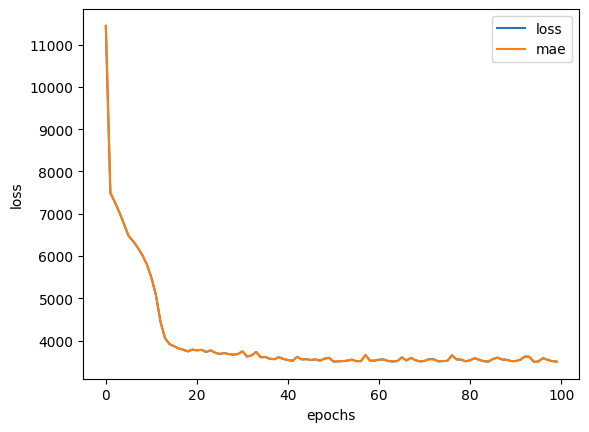

In [ ]:
#Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

## Preprocessing data (normalization and standardization)
In terms of scaling values, neural network tends to prefer normalization.

> If you're not sure on which to use, you could try both and see which performs better.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

#Read in the insurance dataframe
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age","bmi","children"]),
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y (features and labels)
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
# What does our data look like now?
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
# Build a neural network model to fit on our normalized data
# 1 Create the model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#Compile the model
insurance_model_3.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics = ["mae"])

# Fit the model
insurance_model_3.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13343.8477 - mae: 13343.8477
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13335.5576 - mae: 13335.5576
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 13314.7812 - mae: 13314.7812
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 13270.7539 - mae: 13270.7539
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 13191.9961 - mae: 13191.9961
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 13067.2939 - mae: 13067.2939
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 12886.4639 - mae: 12886.4639
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 12639.4854 - mae: 12639.4854
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 12316.2178 - mae: 12316.2178
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 11913.09

In [ ]:
insurance_model_3.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 3443.5479 - mae: 3443.5479


[3443.5478515625, 3443.5478515625]

In [ ]:
insurance_model_3.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 100)               1200      
                                                                 
 dense_15 (Dense)            (None, 10)                1010      
                                                                 
 dense_16 (Dense)            (None, 1)                 11        
                                                                 
Total params: 2221 (8.68 KB)
Trainable params: 2221 (8.68 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
